#Course: Deep Learning
#Program: MBA Tech AI
#Sem: V
# Academic Year: 2023-24
# Instructor: Dr.Radhika Chapaneri
# Experiment No: 8

#Roll No: R046
#Name: Tungishsanjay Sankar
#Batch : B2
#Date of Experiment: 12-10-2023





In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
# Load the fashion-mnist pre-shuffled train data and test data
(X_train, Y_train), (X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
img_rows, img_cols = 28,28

In [ ]:
#cNN
X_train_cnn = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
Y_train_cnn_1 = Y_train

In [ ]:
X_test_cnn = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
Y_test_cnn_1 = Y_test

In [ ]:
X_train_cnn.shape

(60000, 28, 28, 1)

In [ ]:
print("X_train shape:", X_train.shape, "Y_train shape:", Y_train.shape)

X_train shape: (60000, 28, 28) Y_train shape: (60000,)


In [ ]:
fashion_mnist_labels = ["T-shirt/top", #index 0
                        "Trouser",
                        "Pullover",
                        "Dress",
                        "Coat",
                        "Sandal",
                        "Shirt",
                        "Sneaker",
                        "Bag",
                        "Ankle boot"]


In [ ]:
X_train_cnn = X_train_cnn.astype('float32')
X_test_cnn = X_test_cnn.astype('float32')
X_train_cnn /= 255
X_test_cnn /=255

In [ ]:
num_classes = 10

Y_train_cnn = keras.utils.to_categorical(Y_train_cnn_1, num_classes)

Y_test_cnn = keras.utils.to_categorical(Y_test_cnn_1, num_classes)

In [ ]:
Y_train_cnn[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train_cnn, X_val_cnn, Y_train_cnn, Y_val_cnn = train_test_split(X_train_cnn,
                                                                  Y_train_cnn,
                                                                  test_size=0.2)

In [ ]:
print(X_train_cnn.shape)
print(X_val_cnn.shape)
print(X_test_cnn.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
print(Y_train_cnn.shape)
print(Y_val_cnn.shape)
print(Y_test_cnn.shape)

(48000, 10)
(12000, 10)
(10000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
input_shape=(img_rows,img_cols,1)

In [ ]:
model_cnn = Sequential()

In [ ]:
model_cnn.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='normal', input_shape=input_shape))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Dropout(0.25))

In [ ]:
model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Dropout(0.25))

In [ ]:
model_cnn.add(Conv2D(128, (3,3), activation='relu'))
model_cnn.add(Dropout(0.4))

In [ ]:
model_cnn.add(Flatten())

In [ ]:
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.3))

In [ ]:
model_cnn.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_cnn.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
history=model_cnn.fit(X_train_cnn, Y_train_cnn,
                  batch_size=256,
                  epochs=50,
                  verbose=1, #Output after all epochs
                  validation_data=(X_val_cnn, Y_val_cnn))

Epoch 1/50
188/188 [==============================] - 17s 12ms/step - loss: 0.8955 - accuracy: 0.6616 - val_loss: 0.5476 - val_accuracy: 0.7876
Epoch 2/50
188/188 [==============================] - 2s 9ms/step - loss: 0.5540 - accuracy: 0.7931 - val_loss: 0.4604 - val_accuracy: 0.8254
Epoch 3/50
188/188 [==============================] - 2s 9ms/step - loss: 0.4791 - accuracy: 0.8199 - val_loss: 0.3939 - val_accuracy: 0.8525
Epoch 4/50
188/188 [==============================] - 2s 9ms/step - loss: 0.4351 - accuracy: 0.8385 - val_loss: 0.3680 - val_accuracy: 0.8627
Epoch 5/50
188/188 [==============================] - 2s 9ms/step - loss: 0.3984 - accuracy: 0.8540 - val_loss: 0.3360 - val_accuracy: 0.8737
Epoch 6/50
188/188 [==============================] - 2s 10ms/step - loss: 0.3761 - accuracy: 0.8620 - val_loss: 0.3238 - val_accuracy: 0.8797
Epoch 7/50
188/188 [==============================] - 2s 9ms/step - loss: 0.3624 - accuracy: 0.8679 - val_loss: 0.3079 - val_accuracy: 0.8857
Epo

In [ ]:
score = model_cnn.evaluate(X_test_cnn,Y_test_cnn, verbose = 1)
print()
print('MLP Test Loss: ', score[0])
print('MLP Test Accuracy: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2375 - accuracy: 0.9144

MLP Test Loss:  0.23745398223400116
MLP Test Accuracy:  0.9143999814987183


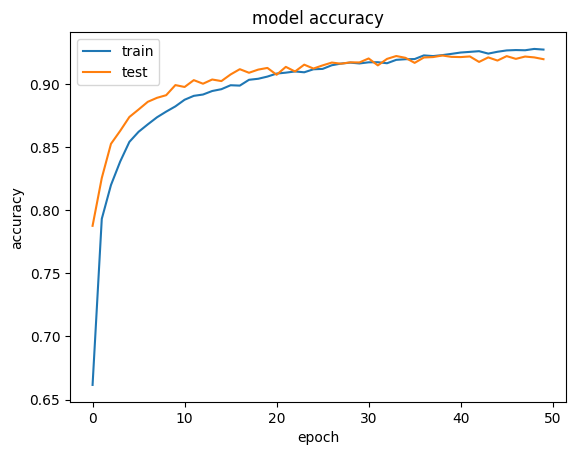

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

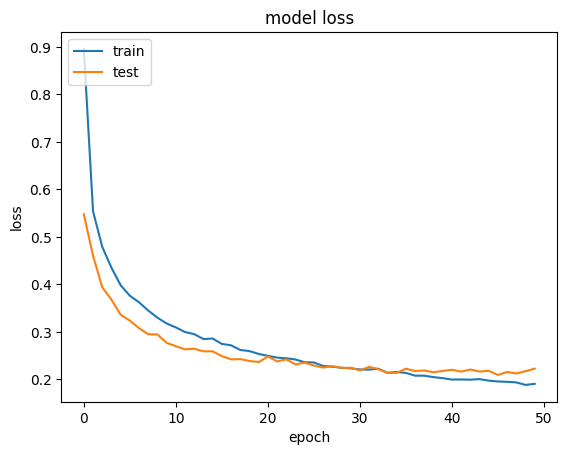

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()